##  Plotly, Sweetviz, Pandas Profiling

### Завдання

**1.Створіть xls-документ, що містить дані:** про міста, їх населення, середній дохід жителів, площу території та наявність метрополітену. Кількість записів у документі – 20. 

**2. За допомогою Plotly візуалізуйте залежності:** населення міста від його площі та середнього доходу від населення. Помістіть ці графіки на один малюнок.

**3. Побудуйте матрицю кореляцій та візуалізуйте її через heatmap.**

**4. Побудуйте звіти про таблицю за допомогою Sweetviz та Pandas Profiling; напишіть коротке порівняння цих звітів.**

### Розв'язок

In [30]:
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
import pandas as pd
import sweetviz as sv
import ydata_profiling as yp

**1. Датафрейм з інформацією про міста.**

In [31]:
cities = pd.read_excel("dz34.xlsx")
cities

,City,Country,Population,Area (km2),Average person's income (€ per year),Subway availability
0,London,United Kingdom,8961989,1572,47500,1
1,Berlin,Germany,3644826,892,41125,1
2,Madrid,Spain,3334730,607,38112,1
3,Kyiv,Ukraine,2962180,847,18000,1
4,Rome,Italy,2783809,1287,35189,1
5,Paris,France,2229095,105,50600,1
6,Vienna,Austria,1898000,415,40094,1
7,Hamburg,Germany,1841179,755,25808,1
8,Warsaw,Poland,1777972,517,19006,1
9,Barcelona,Spain,1664182,100,36962,1


In [3]:
cities1 = cities.sort_values(by = ["Area (km2)"])
cities2 = cities.sort_values(by = ["Population"])

**2. Графіки залежності населення міста від його площі та середнього доходу від населення.**

In [17]:
fig = make_subplots(rows=2, cols=2)

fig.add_scatter(x = cities1["Area (km2)"], y = cities1["Population"], name = "Population", row = 1, col =  1)
fig.add_scatter(x = cities2["Population"], y = cities2["Average person's income (€ per year)"], name = "Average person's income", row = 2, col =  1)
fig.update_traces(line_color='red', row = 1, col = 1)
fig.update_traces(line_color='black', row = 2, col = 1)

fig.update_layout(title="Dependence of the city's population on its area and Average person's income per population.")
fig.update_xaxes(title_text="Area (km2)", row=1, col=1)
fig.update_yaxes(title_text = "Population", row = 1, col = 1)
fig.update_xaxes(title_text="Population", row=2, col=1)
fig.update_yaxes(title_text = "Average person's income (€ per year)", row = 2, col = 1)

fig.show()

**Screenshot of "Dependence of the city's population on its area and Average person's income per population".**

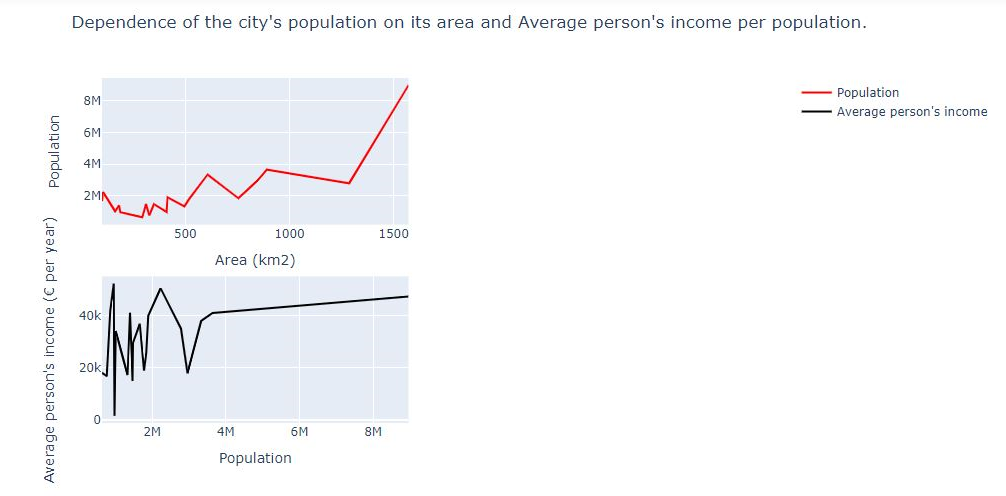

**3. Матриця кореляції і теплова діаграма:**

In [32]:
cities_cor = pd.read_excel("dz34.xlsx", index_col=0)
c_corr = cities_cor.corr()
fig = go.Figure()
fig.add_trace(go.Heatmap(x = c_corr.columns, y = c_corr.index, z = c_corr, colorscale='inferno'))
fig.update_layout(title="Heat Diagram")

C:\Users\Користувач\AppData\Local\Temp\ipykernel_1600\2952114089.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



**Screenshot of "Heat Diagram".**

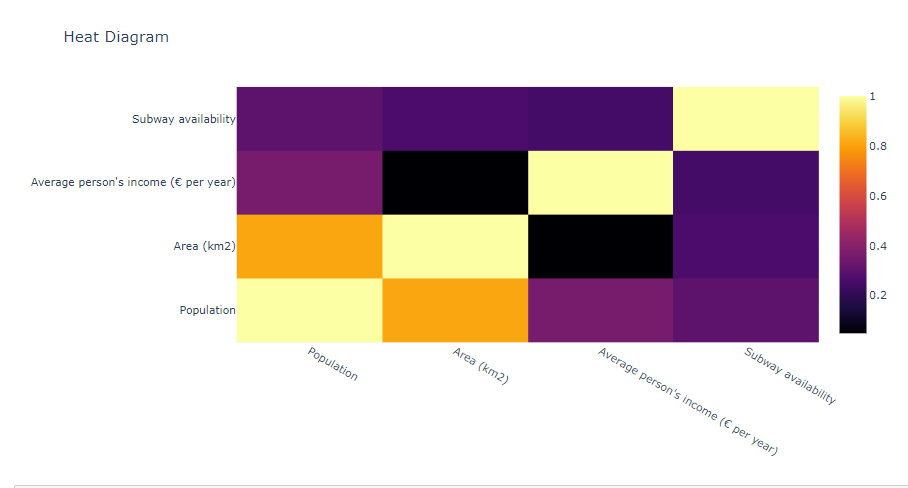

**4. Звіти про таблицю за допомогою Sweetviz та Pandas Profiling**

C:\Users\Користувач\AppData\Local\Programs\Python\Python310\lib\site-packages\sweetviz\dataframe_report.py:74: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Users\Користувач\AppData\Local\Programs\Python\Python310\lib\site-packages\sweetviz\dataframe_report.py:109: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



                                             |                                                                …

C:\Users\Користувач\AppData\Local\Programs\Python\Python310\lib\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

C:\Users\Користувач\AppData\Local\Programs\Python\Python310\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning:

The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.

C:\Users\Користувач\AppData\Local\Programs\Python\Python310\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning:

The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.

C:\Users\Користувач\AppData\Local\Programs\Python\Python310\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning:

The 'mad' method is deprecated and will be removed in a future version. To compute the same


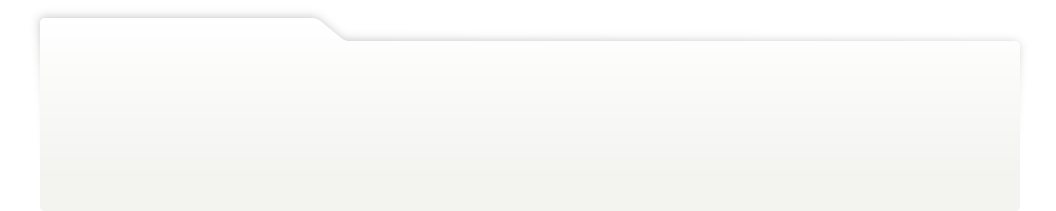
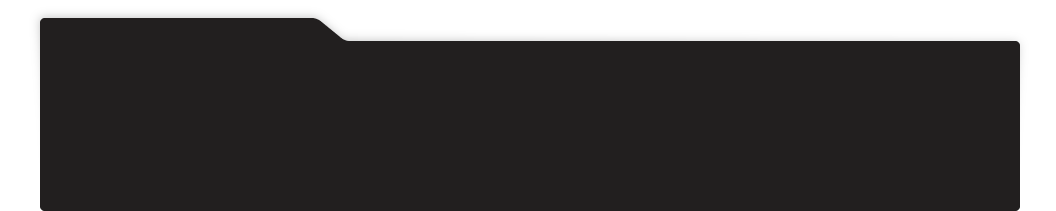
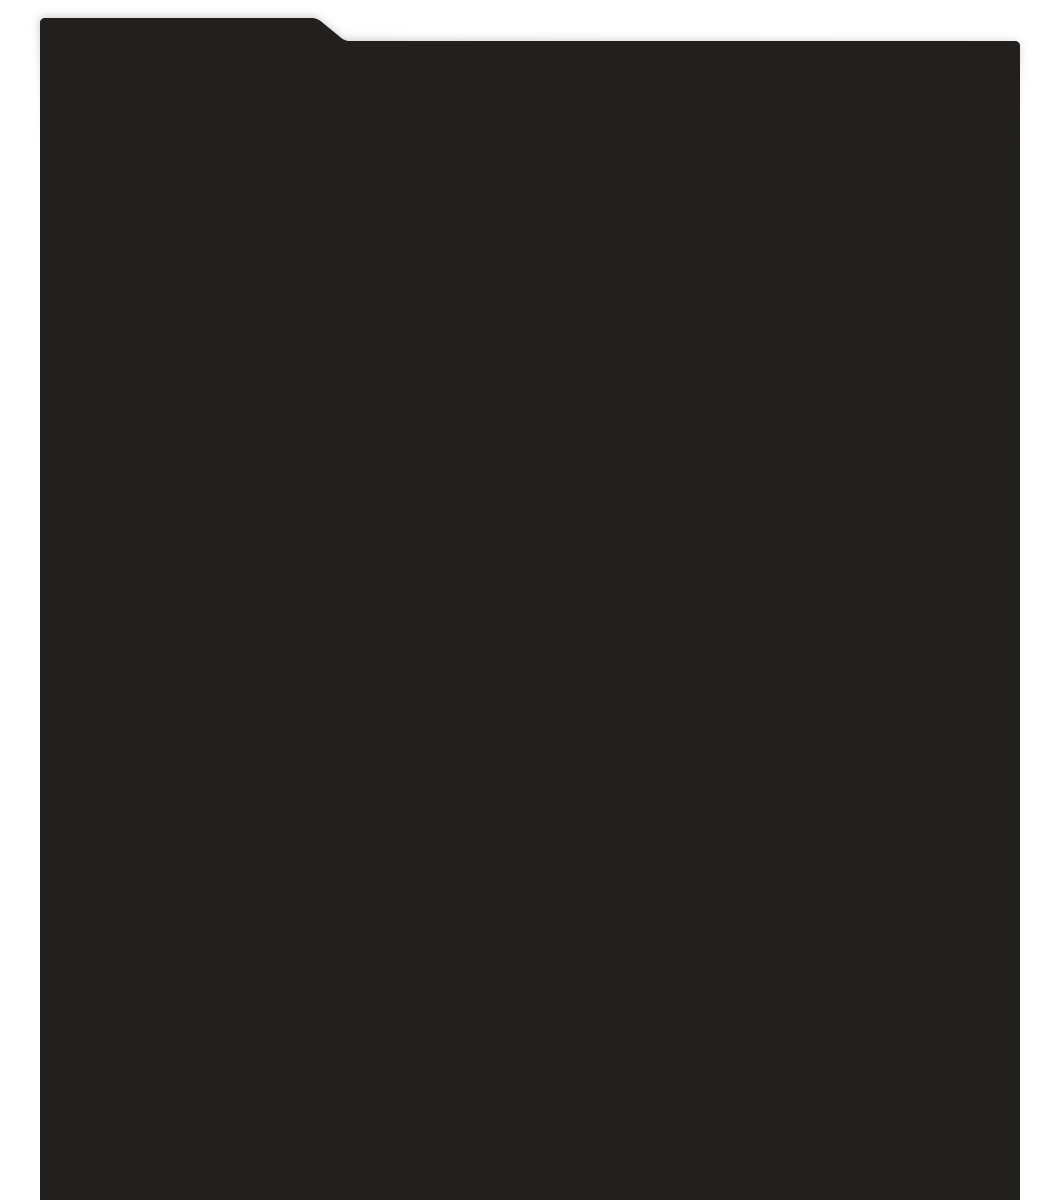
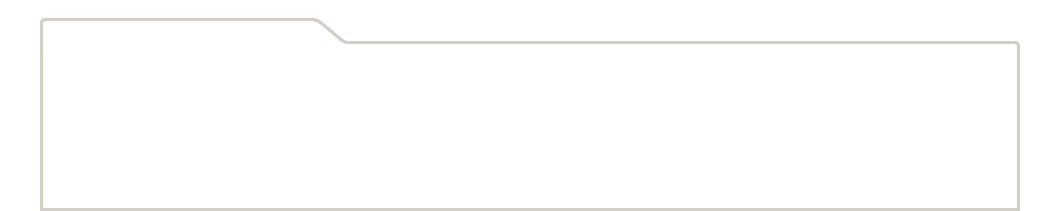
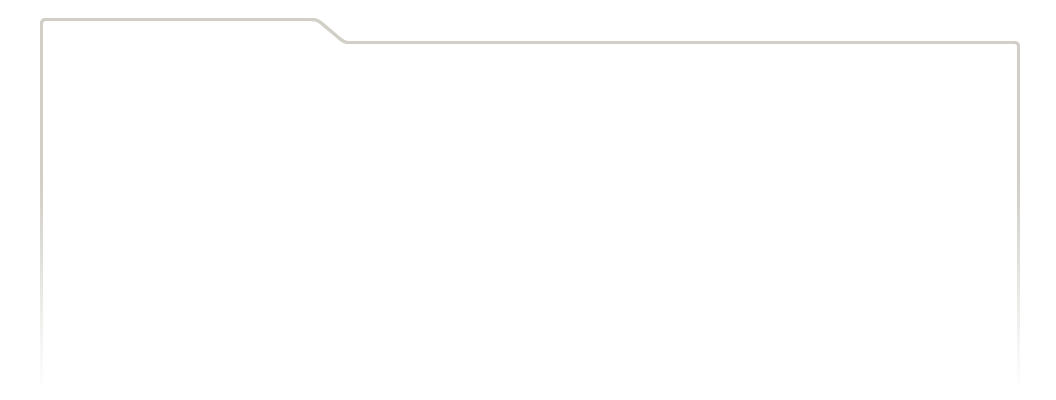
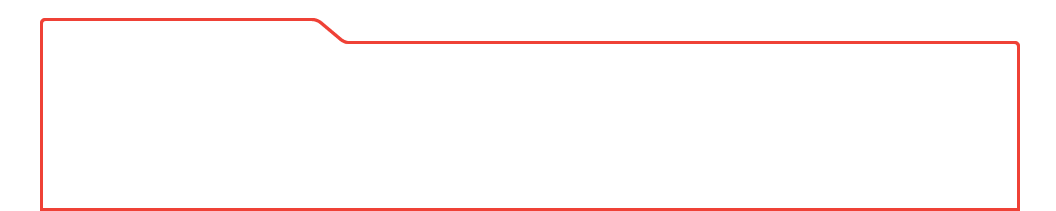
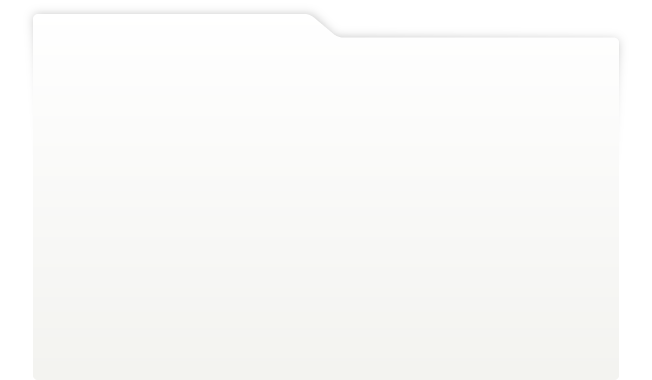
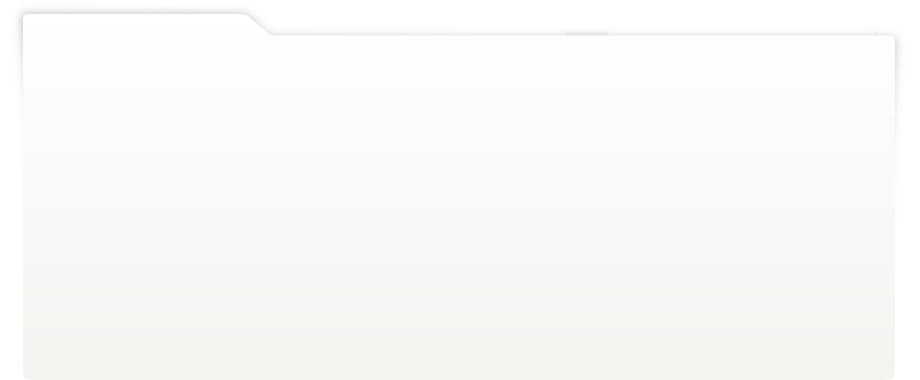
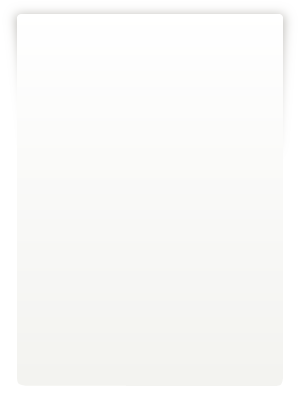
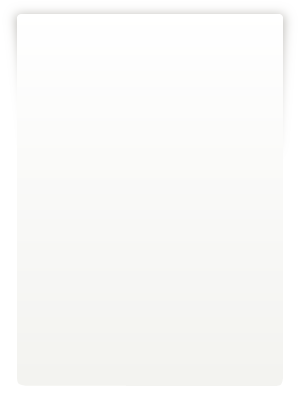
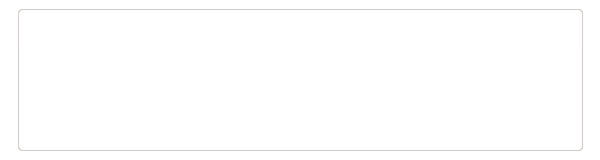
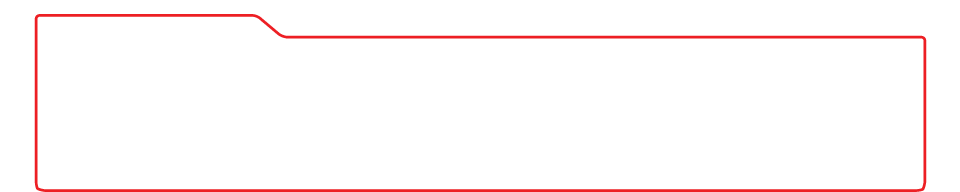
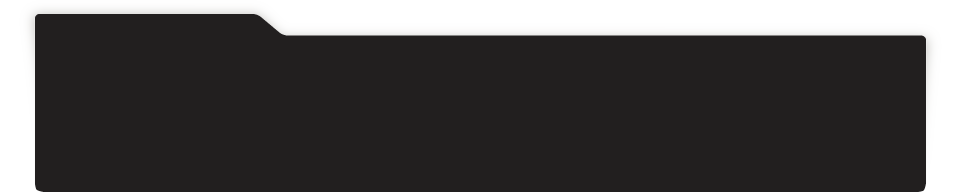
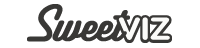
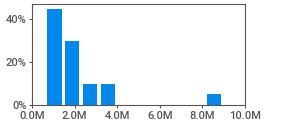
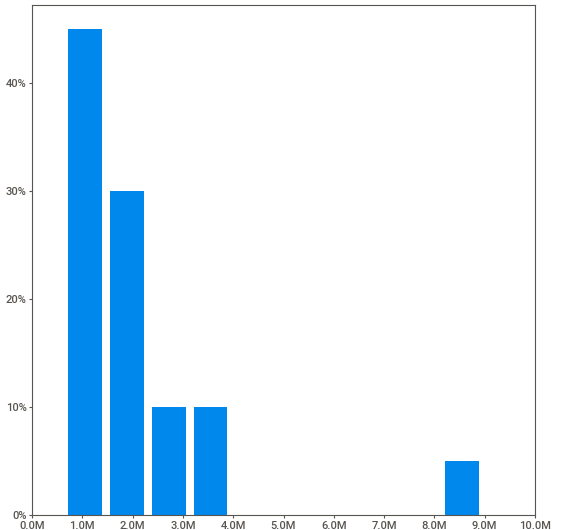
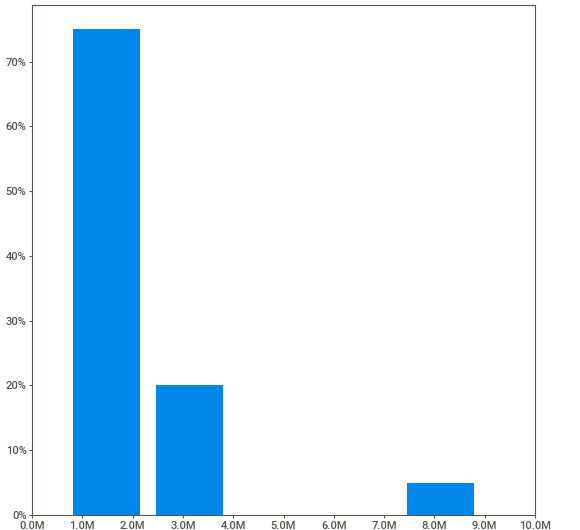
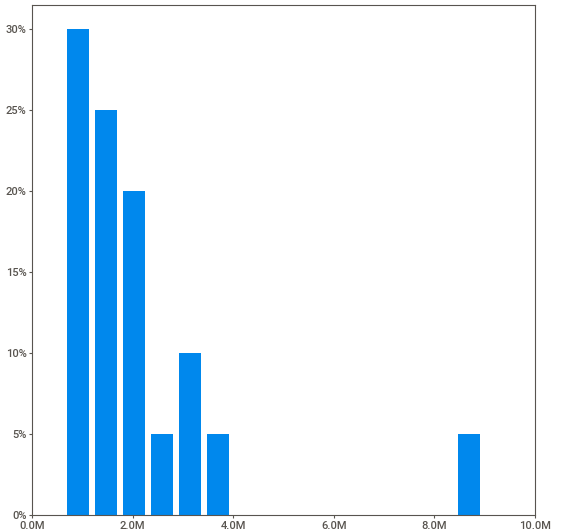
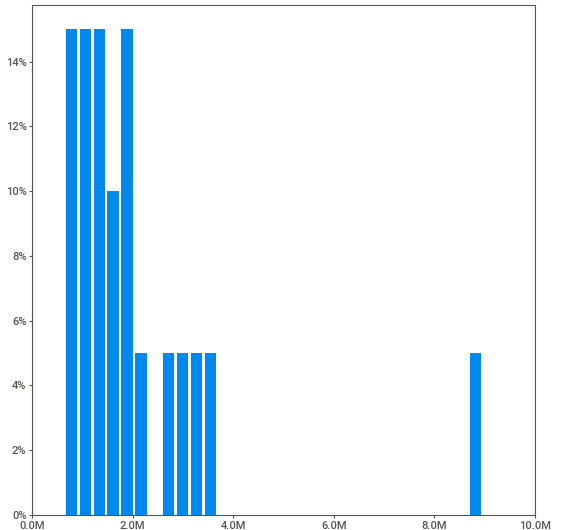
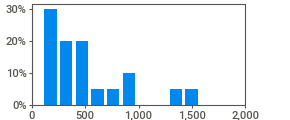
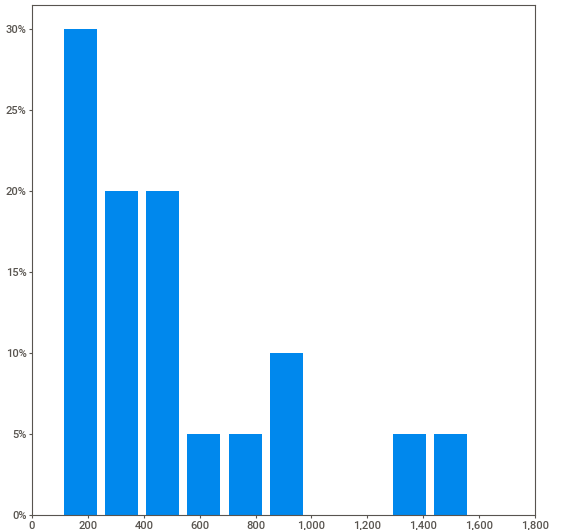
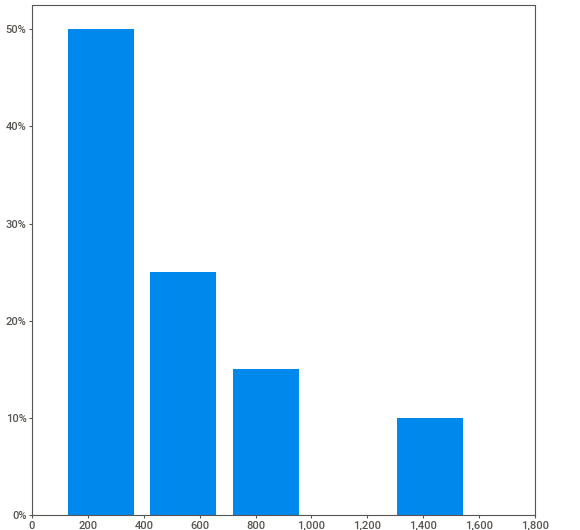
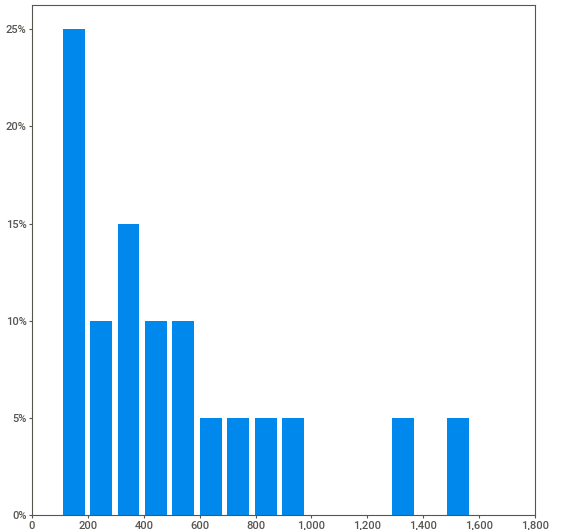
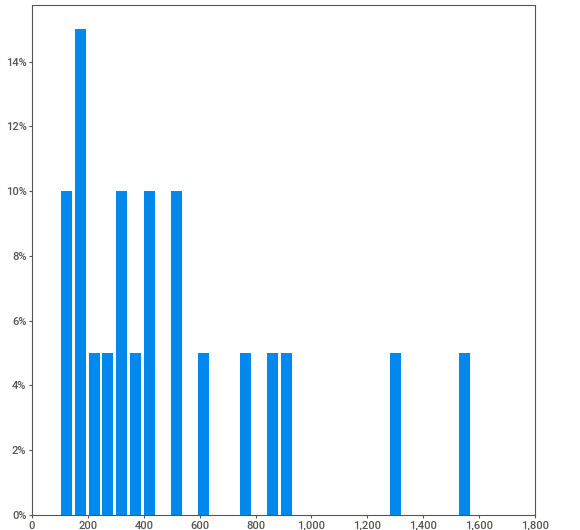
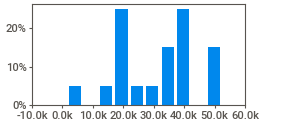
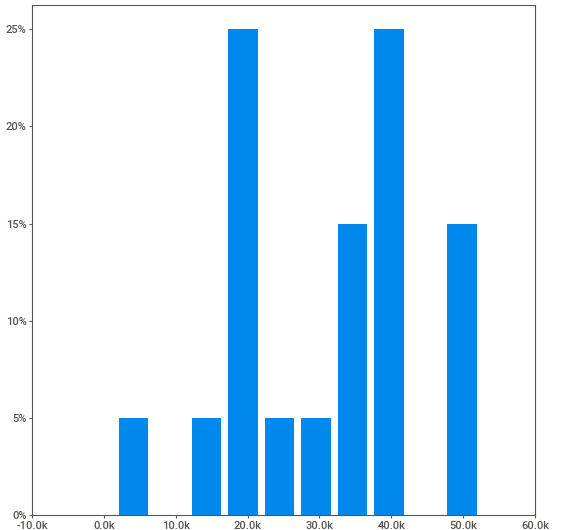
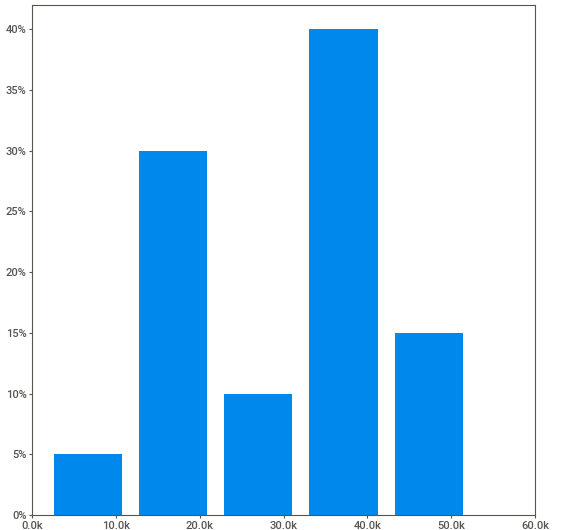
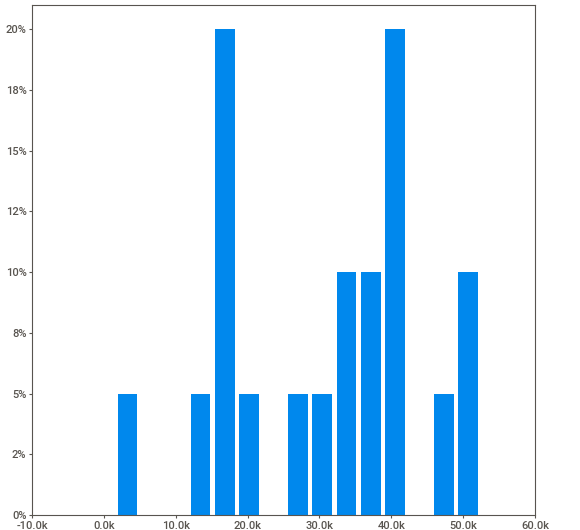
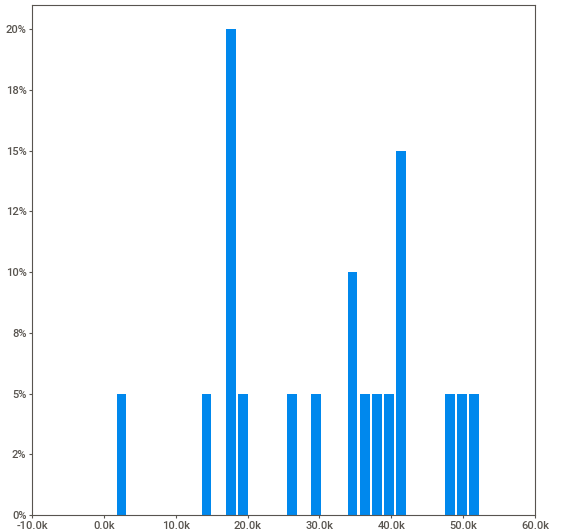
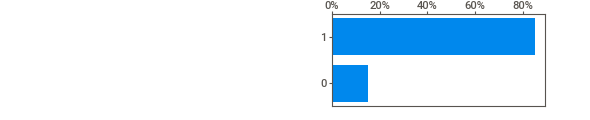
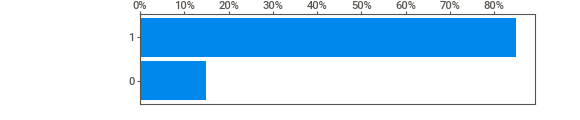
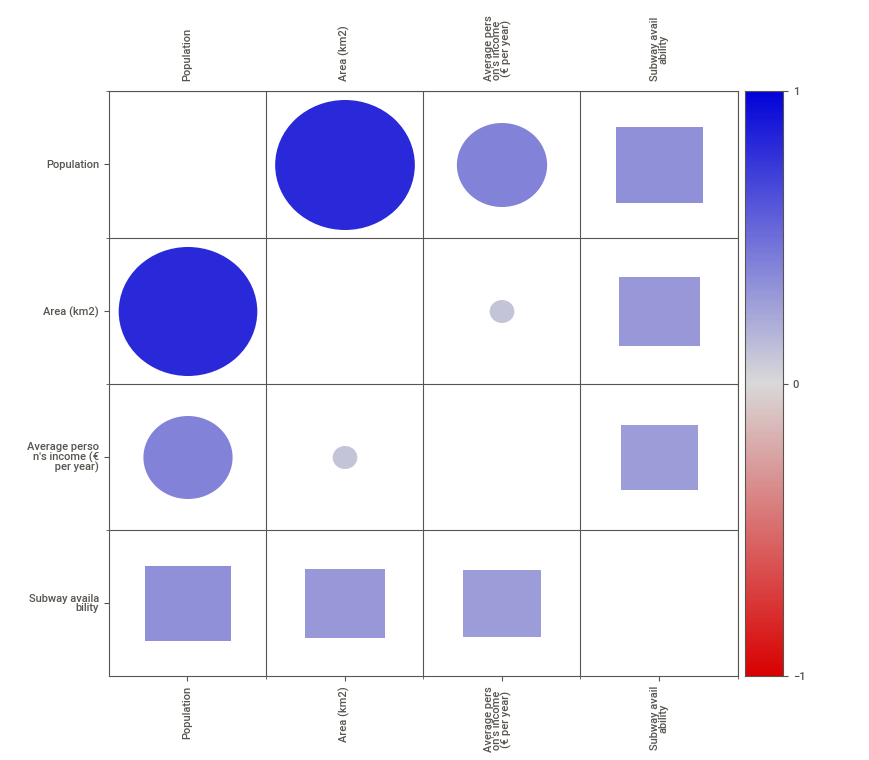
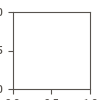

In [26]:
result = sv.analyze(cities)
result.show_notebook()

**Sweetviz Report Screenshot**

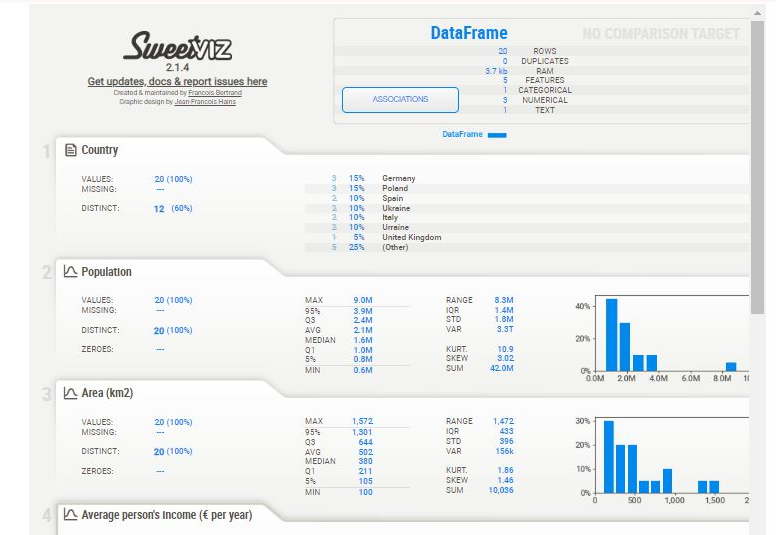

In [24]:
yp.ProfileReport(cities)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Pandas-profiling Screenshot**

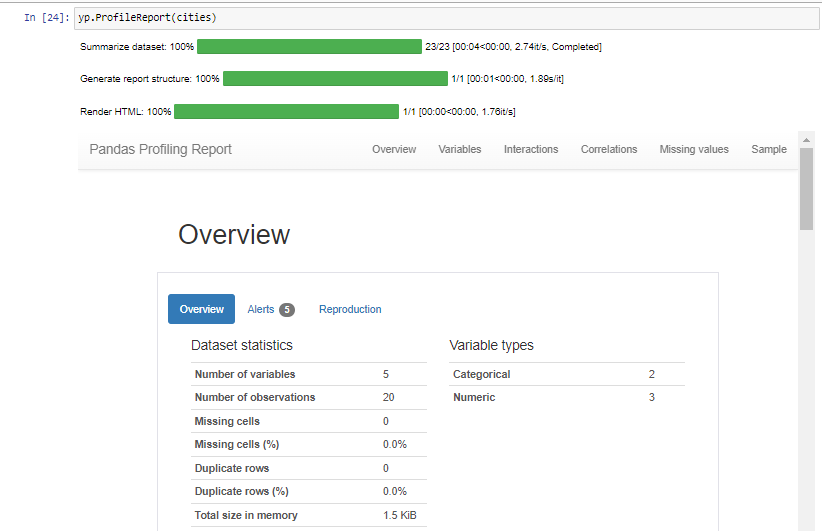

**Pandas-profiling**  створює докладний звіт про профіль даних за допомогою одного рядка коду і виводить його у вигляді рядка в блокноті Jupyter. У звіті міститься більшість елементів профілювання даних, включаючи описову статистику та метрики якості даних.

**Sweet-Viz** – це комплексний програмне рішення із привабливим дизайном, яке охоплює значну частину необхідного аналізу профілювання даних. Ця бібліотека дає змогу порівнювати дві версії одного набору даних.

Можливості бібліотек вражають. Використання кожної з них буде залежати від мети аналізу в конкретному випадку.

Все ж мені здається, що **Pandas-profiling** має більш friendly interface і містить більше інформації, ніж **Sweet-Viz**.
